## Boyle's law

We present a copy of Boyle's original dataset from http://archive.ics.uci.edu which in turn has it from: 
William Francis Magie, *A Source Book in Physics*, Harvard University Press, 1965, p. 87.

The reference model is $y = K / x$. However the people at ics.uci.edu comment:

> Comments: The reference relation leaves clearly patterned residuals.
> It is possible to get a better fit of the form
> $y=k_{1}/x^{2}+k_{2}/x+k_{3}$ or one the form
> $y+k_{1}=k_{2}/(x+k_{3})$.  The former is closer to what scientists
> now use; the latter is a simple inverse relationship,
> assuming that Boyle had the origin of his measurement scales slightly
> off.  Note that Boyle's original article (as reproduced by Magie)
> includes two data sets, of which this is the second.  The first fits
> the reference relation very nicely.

We will fit the data to all of these models and see which one is best. 

Demonstration: 
1. Power Model, PadeModel and CompoundModel
2. Parameter fit 
3. Evidence calculation
    

Author: Do Kester


import classes

In [1]:
import numpy as numpy
import math

from BayesicFitting import PolynomialModel
from BayesicFitting import PowerModel
from BayesicFitting import PadeModel

from BayesicFitting import LevenbergMarquardtFitter
from BayesicFitting import formatter as fmt
from BayesicFitting import plotFit
import matplotlib.pyplot as plt

present the data

In [2]:
# x is pressure; y is volume

x = [1.0, 1.5, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
     9.0, 10.0, 12.0, 14.0, 16.0, 18.0, 20.0, 24.0, 28.0, 32.0]
y = [29.750, 19.125, 14.375, 9.500, 7.125, 5.625, 4.875, 4.250, 3.750, 
     3.375, 3.000, 2.625, 2.250, 2.000, 1.875, 1.750, 1.500, 1.375, 1.250]


Define the model

In [3]:
model1 = PowerModel( -1 )
print( model1 )


Power: f( x:p ) = p_0 * x^-1.0


define the fitter: Fitter

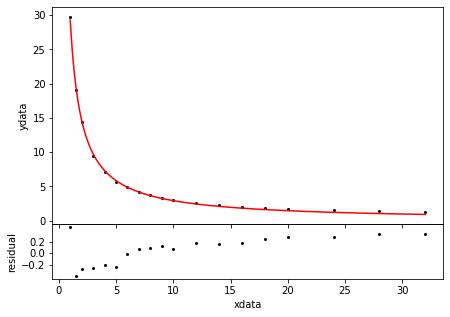

In [4]:
fitter = LevenbergMarquardtFitter( x, model1 )
 
# find the parameters
param = fitter.fit( y, plot=True )

  

In [5]:
print( "Parameters :", fmt( param, max=None ) )
print( "StDevs     :", fmt( fitter.stdevs, max=None ) )
print( "Chisq      :", fmt( fitter.chisq ) )
print( "Scale      :", fmt( fitter.scale ) )
evi = fitter.getEvidence( limits=[20,40] )
print( "Evidence with fixed scale  :", fmt( evi ) )
evi1 = fitter.getEvidence( limits=[20,40], noiseLimits=[00.1,1] )
print( "Evidence with fitted scale :", fmt( evi1  ) )
print( "Covar matrix :" )
print( fmt( fitter.covariance))



Parameters :    29.293
StDevs     :     0.179
Chisq      :     1.169
Scale      :     0.255
Evidence with fixed scale  :    -8.891
Evidence with fitted scale :    -2.345
Covar matrix :
    0.032


The Evidence with fitted scale is clearly better than that with a fixed scale, because the actual noise is much smaller than the presumed fixed scale (at 1.0). 
From now on we will compare evidences with optimized noise scales.

Indeed the residuals show systematic effect effects, as the comments already suggested.

We try another model that has a zero shift in the volume (y). We add a constant to the model.

In [6]:
model2 = PowerModel( -1 )
model2 += PolynomialModel( 0 )
print( model2 )

Power: f( x:p ) = p_0 * x^-1.0 +
Polynomial: f( x:p ) = p_1


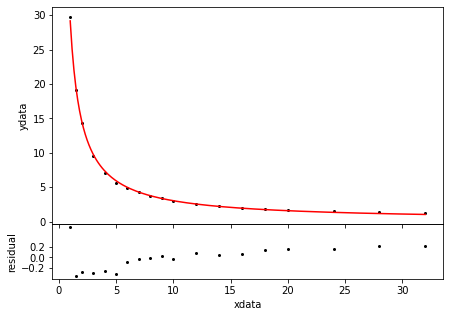

In [7]:
fitter = LevenbergMarquardtFitter( x, model2 )
pars = fitter.fit( y, plot=True )

In [8]:
print( "Parameters :", fmt( pars, max=None ) )
print( "StDevs     :", fmt( fitter.stdevs, max=None ) )
print( "Chisq      :", fmt( fitter.chisq ) )
print( "Scale      :", fmt( fitter.scale ) )
evi2 = fitter.getEvidence( limits=[[20,-1],[40,1]], noiseLimits=[0.01,1] )
print( "Evidence   :", fmt( evi2 ) )
print( "Covar matrix :" )
print( fmt( fitter.covariance))



Parameters : [   29.039    0.127]
StDevs     : [    0.224    0.073]
Chisq      :     0.991
Scale      :     0.241
Evidence   :    -4.059
Covar matrix :
[[    0.050   -0.011]
 [   -0.011    0.005]]


The evidence did not improve and we still see the systematic effects in the residuals.

Let us try the model that was suggested with an offset in $x$ and in $y$:

$y+k_{1}=k_{2}/(x+k_{3})$



In [9]:
model3 = PolynomialModel( 0 )
model3 += PadeModel( 0, 1, fixed={2:1} )
print( model3 )
model3.parameters = [0.0, 29.0, 0.0]

Polynomial: f( x:p ) = p_0 +
Pade: f( x:p ) = ( p_1 ) / ( p_2 + (1.0) * x )


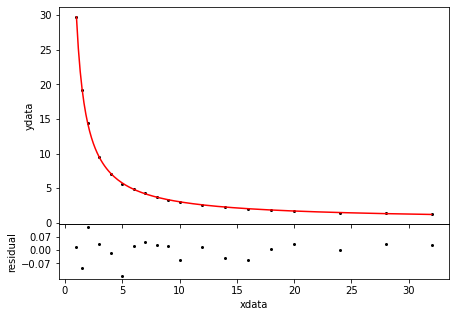

In [10]:
fitter = LevenbergMarquardtFitter( x, model3 )
pars = fitter.fit( y, plot=True )

In [11]:
print( "Parameters :", fmt( pars, max=None ) )
print( "StDevs     :", fmt( fitter.stdevs, max=None ) )
print( "Chisq      :", fmt( fitter.chisq ) )
print( "Scale      :", fmt( fitter.scale ) )
evi3 = fitter.getEvidence( limits=[[-1,20,-1],[1,40,1]], noiseLimits=[0.01,1] )
print( "Evidence   :", fmt( evi3 ) )
print( "Covar matrix :" )
print( fmt( fitter.covariance))


Parameters : [    0.400   26.249   -0.105]
StDevs     : [    0.024    0.173    0.006]
Chisq      :     0.058
Scale      :     0.060
Evidence   :     4.254
Covar matrix :
[[    0.001   -0.003   -0.000]
 [   -0.003    0.030    0.001]
 [   -0.000    0.001    0.000]]


Now we have a fit with uncorrelated residuals and the evidence is also better. The log(Evidence) went up by 6.6 (= 4.25 + 2.34), which means that the odds 

$\frac{pr( model3 )}{pr( model1 )} = 4e6$

We can try yet another model with only the shift in the pressure
$y = k_1 / ( k_2 + x )$
but we will not, as the results are very similar as those for model2. 

We want to try the last suggestion:

$y=k_{1}/x^{2}+k_{2}/x+k_{3}$

In [12]:
model4 = PowerModel( 0.0 )
model4 += PowerModel( -1.0 )
model4 += PowerModel( -2.0 )
print( model4 )
model4.parameters = [0.0, 29.0, 0.0]

Power: f( x:p ) = p_0 * x^0.0 +
Power: f( x:p ) = p_1 * x^-1.0 +
Power: f( x:p ) = p_2 * x^-2.0


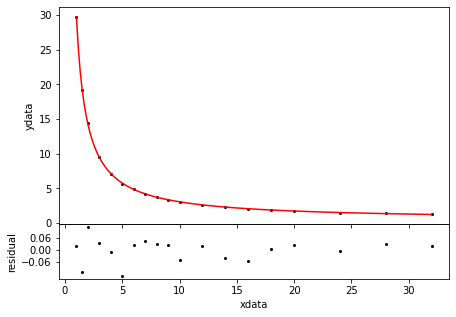

In [13]:
fitter = LevenbergMarquardtFitter( x, model4 )
pars = fitter.fit( y, plot=True )

In [14]:
print( "Parameters :", fmt( pars, max=None ) )
print( "StDevs     :", fmt( fitter.stdevs, max=None ) )
print( "Chisq      :", fmt( fitter.chisq ) )
print( "Scale      :", fmt( fitter.scale ) )
evi4 = fitter.getEvidence( limits=[[-1,20,0],[1,40,4]], noiseLimits=[0.01,1] )
print( "Evidence   :", fmt( evi4 ) )
print( "Covar matrix :" )
print( fmt( fitter.covariance))


Parameters : [    0.411   26.076    3.241]
StDevs     : [    0.026    0.195    0.204]
Chisq      :     0.059
Scale      :     0.061
Evidence   :     5.465
Covar matrix :
[[    0.001   -0.004    0.004]
 [   -0.004    0.038   -0.038]
 [    0.004   -0.038    0.042]]


It is even better by 158 dB (= 10 * 10^(5.5 - 4.3))